#一次元の物体の運動
物体は、原点にバネれ結びつけられ、レールの上を動くものとする。

物体の質量をm、時刻の速度をv(t)、位置をx(t)とする。ばね定数はkとする。

バネが物体におよぼす力は、バネの伸びに比例し、向きはいつも原点方向である。
$$F(t)=-kx(t)$$
物体は力を受けて加速される。
$$F(t)=ma(t)$$
加速度は速度の時間微分、
$$a(t)=\frac{{\rm d}v(t)}{{\rm d}t}$$
速度は位置の時間微分である。
$$v(t)=\frac{{\rm d}x(t)}{{\rm d}t}$$

位置x(t)がわかれば、力F(t)がわかり、加速度a(t)が求まる。

一方、2つの微分方程式からわかることは、加速度を積分すれば速度が得られ、速度を積分すれば位置が得られる。

加速度が簡単な関数で表現できる場合には、微分方程式を解けば位置は得られる。
$$m\frac{{\rm d^2}x(t)}{{\rm d}t^2}=-kx(t)$$
これを解くと、$x(t)=\sin\left(\sqrt{\frac{k}{m}}t+C\right)$が得られる。つまり、物体は原点の前後でサイン波で振動する。
##一般の場合
バネが及ぼす力が単純な関数で書けず、微分方程式が解けない場合には、微分方程式を差分方程式で近似して位置を計算する。
$$a(t)=\frac{{\rm d}v(t)}{{\rm d}t}$$
より、
$$v(t+\Delta t)\sim v(t)+a(t){\rm \Delta}t$$
、つまり、ある時刻の速度と加速度がわかれば、$\Delta t$後の速度がおおよそ求まることを示している。

同様に
$$v(t)=\frac{{\rm d}x(t)}{{\rm d}t}$$
より、
$$x(t+\Delta t)\sim x(t)+v(t){\rm \Delta}t$$
、つまり、ある時刻の位置と速度がわかれば、$\Delta t$後の位置がおおよそ求まることを示している。$\Delta t$が小さい極限で、差分方程式は微分方程式に一致する。

これをPythonで書いてみよう。

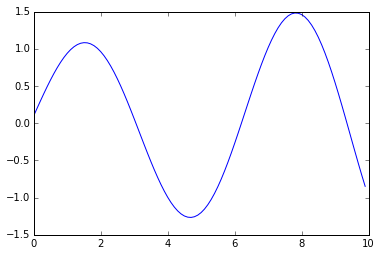

In [10]:
%matplotlib inline

import pylab

x = 0.0   #初期位置は原点
v = 1.0   #初速1
k = 1.0   #バネ定数
m = 1.0   #質量
dt = 0.1 #差分のきざみ幅

#時刻と位置を記録するリスト
ts = []
xs = []
#とりあえず100ステップ回してみる。
for loop in range(100):
    #時刻を求める。
    t = dt*loop
    #位置から力を求める。
    F = -k * x
    #力から加速度が決まる。
    a = F / m
    #dt後の速度と位置を求める。
    v, x = v + a*dt, x + v*dt
    
    ts.append(t)
    xs.append(x)

pylab.plot(ts,xs)

解析解は1周期が6.28なので、ほぼ正しい。でもなんだか振幅が大きくなっている。

In [4]:
2*pi*(m/k)**0.5

6.283185307179586

In [22]:
ほんとうにちゃんと周期運動になっているかどうかを見るために、時間を長くして、位置と速度でプロットする。

SyntaxError: invalid character in identifier (<ipython-input-22-4740f9ac7628>, line 1)

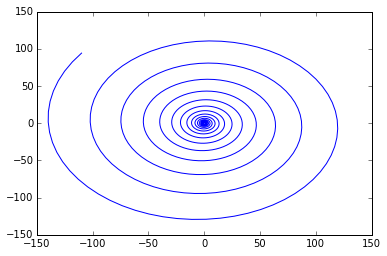

In [12]:
%matplotlib inline

import pylab

x = 0.0   #初期位置は原点
v = 1.0   #初速1
k = 1.0   #バネ定数
m = 1.0   #質量
dt = 0.1 #差分のきざみ幅

#時刻と位置を記録するリスト
ts = []
xs = []
vs = []

#1000ステップ回してみる。
for loop in range(1000):
    #時刻を求める。
    t = dt*loop
    #位置から力を求める。
    F = -k * x
    #力から加速度が決まる。
    a = F / m
    #dt後の速度と位置を求める。
    v, x = v + a*dt, x + v*dt

    
    ts.append(t)
    xs.append(x)
    vs.append(v)


pylab.plot(xs,vs)

やはり振幅が大きくなっている。これが微分方程式を差分方程式にしたために生じた誤差。誤差を小さくしたいなら、時間刻みを小さくすればいい。

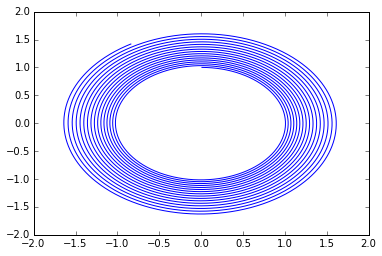

In [13]:
%matplotlib inline

import pylab

x = 0.0   #初期位置は原点
v = 1.0   #初速1
k = 1.0   #バネ定数
m = 1.0   #質量
dt = 0.01 #差分のきざみ幅を1/10にする

#時刻と位置を記録するリスト
ts = []
xs = []
vs = []

#10000ステップ回してみる。
for loop in range(10000):
    #時刻を求める。
    t = dt*loop
    #位置から力を求める。
    F = -k * x
    #力から加速度が決まる。
    a = F / m
    #dt後の速度と位置を求める。
    v, x = v + a*dt, x + v*dt

    
    ts.append(t)
    xs.append(x)
    vs.append(v)


pylab.plot(xs,vs)

それでもだんだん振幅は大きくなる。そこで、計算順序を少し工夫する。

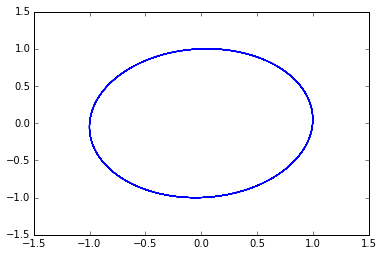

In [14]:
%matplotlib inline

import pylab

x = 0.0   #初期位置は原点
v = 1.0   #初速1
k = 1.0   #バネ定数
m = 1.0   #質量
dt = 0.1 #差分のきざみ幅

#時刻と位置を記録するリスト
ts = []
xs = []
vs = []

#1000ステップ回してみる。
for loop in range(1000):
    #時刻を求める。
    t = dt*loop
    #位置から力を求める。
    F = -k * x
    #力から加速度が決まる。
    a = F / m
    #dt後の速度を先に求める。
    v = v + a*dt
    #その速度を使って、位置を計算する
    x = x + v*dt

    ts.append(t)
    xs.append(x)
    vs.append(v)


pylab.plot(xs,vs)

こころもち、軌道が楕円になっているように見えるが、dtを小さくしなくても誤差が蓄積しなくなった。(解析解では真円になる)

さらに計算順序を工夫すると、誤差の蓄積を避けられる。(Velocity Verlet法)

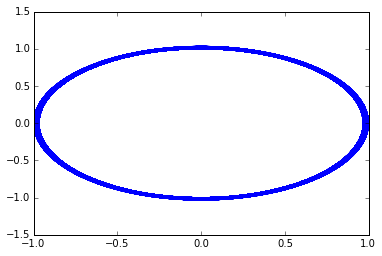

In [21]:
%matplotlib inline

import pylab

x = 0.0   #初期位置は原点
v = 1.0   #初速1
k = 1.0   #バネ定数
m = 1.0   #質量
dt = 0.5 #差分のきざみ幅

#時刻と位置を記録するリスト
ts = []
xs = []
vs = []

#10000ステップ回してみる。
for loop in range(10000):
    #時刻を求める。
    t = dt*loop
    #位置から力を求める。
    F = -k * x
    #力から加速度が決まる。
    a = F / m
    #dt後の速度を先に求める。
    v = v + a*dt
    #その速度を使って、位置をdt/2だけ進める。
    x = x + v*dt/2

    ts.append(t)
    xs.append(x)
    vs.append(v)

    #位置をもうdt/2だけ進める。
    x = x + v*dt/2

pylab.plot(xs,vs)

軌道が太く見えるのは、毎回微妙に異なる軌道を通っているということを表している。しかし、誤差が一方的に蓄積することは避けられている。

#2次元の物体の運動
1次元と2次元の違いは、座標がスカラーかベクトルかの違い。

ベクトルの計算は、リストでもできるが、演算が面倒なので、numpyのベクトル型を利用する。

また、今回は、バネではなく$1/r^2$に比例する向心力(重力)を考える。

プログラムは以下のように変更される。

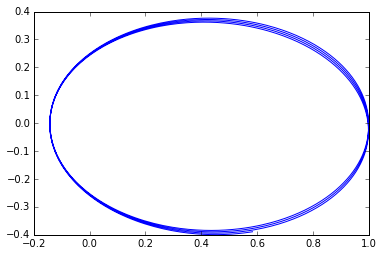

In [9]:
%matplotlib inline

import pylab
import numpy as np

x = np.array([1.0,0.0])   #初期位置
v = np.array([0.0,0.5])   #初速1
k = 1.0   #バネ定数
m = 1.0   #質量
dt = 0.01 #差分のきざみ幅

#時刻と位置を記録するリスト
ts = []
xs = []
vs = []

#1000ステップ回してみる。
for loop in range(1000):
    #時刻を求める。
    t = dt*loop
    #原点からの距離を求める。
    r = np.linalg.norm(x)
    #位置から力ベクトルを求める。
    F = -k * x / r**3
    #力から加速度ベクトルが決まる。
    a = F / m
    #dt後の速度ベクトルを先に求める。
    v = v + a*dt
    #その速度を使って、位置をdt/2だけ進める。
    x = x + v*dt/2

    ts.append(t)
    xs.append(x)
    vs.append(v)

    #位置をもうdt/2だけ進める。
    x = x + v*dt/2

#プロットは、xsのx座標とy座標プロットしたい。
xx = [pos[0] for pos in xs]
yy = [pos[1] for pos in xs]

pylab.plot(xx,yy)

初速が遅いせいで、彗星のような楕円軌道が得られた。線の幅が広く見えるのは誤差のせいで、dtを小さくすると解消する。

見てわかる通り、ループの中身は全く変更が必要ない。(力の式だけはバネから重力に変更している。)この分だと、たぶん3次元でも4次元でも、このプログラムは初期値さえ変えれば動くだろう。
#多体の運動
こんどは、原点に結びつけられた物体の運動ではなく、相互作用する複数の物体の運動を考える。

多体なので、座標は物体の個数だけ必要になる。また、1つの物体には、残り$(n-1)$体からの力がかかるので、力の計算は面倒になる。

とりあえず書いてみよう。

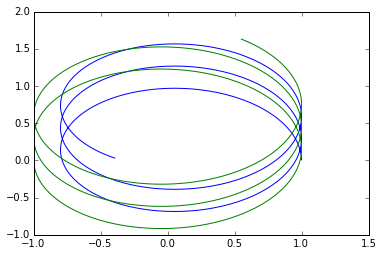

In [21]:
%matplotlib inline

import pylab
import numpy as np

n = 2
d = 2
shape=(n,d)
x = np.array([[1.0,0.0],[-1.0,0.0]])   #初期位置。x[n][0]はn番目の粒子のx座標を表す。
v = np.array([[0.0,0.5],[0.0,-0.5]])   #初速
k = 1.0   #バネ定数
m = np.array([1.0, 0.9])   #質量。一応粒子ごとに違ってもよいことにする。
dt = 0.03 #差分のきざみ幅

#時刻と位置を記録するリスト
ts = []
xs = []
vs = []

#1000ステップ回してみる。
for loop in range(1000):
    #時刻を求める。
    t = dt*loop
    #力を初期化する。
    F = np.zeros(4).reshape(shape)
    #それぞれの粒子について、
    for i in range(n):
        #相互作用する相手
        for j in range(n):
            #自分以外の相手だけ
            if i != j:
                #相対位置ベクトルを求める。
                dx = x[i] - x[j]
                r = np.linalg.norm(dx)
                #位置から力ベクトルを求める。
                F[i] += -k * dx / r**3
    #これで、それぞれの粒子に加わる力がもとまった。
    #以下の処理も各粒子について行う。
    #それぞれの粒子について、
    for i in range(n):
        #力から加速度ベクトルが決まる。
        a = F[i] / m[i]
        #dt後の速度ベクトルを先に求める。
        v[i] = v[i] + a*dt
        #その速度を使って、位置をdt/2だけ進める。
        x[i] = x[i] + v[i]*dt/2

    ts.append(t)
    xs.append(x.copy())
    vs.append(v.copy())

    #それぞれの粒子について、
    for i in range(n):
        #位置をもうdt/2だけ進める。
        x[i] = x[i] + v[i]*dt/2

#それぞれの粒子について、
for i in range(n):
    #プロットは、xsのx座標とy座標プロットしたい。
    xx = [pos[i][0] for pos in xs]
    yy = [pos[i][1] for pos in xs]
    pylab.plot(xx,yy)

appendのところに注意が必要です。リストにmutableな値をアペンドして、あとからその値を変更すると、リストの中身まで変わってしまいます。それを避けるために、コピーをとってからアペンドしています。

繰り返しの回しかたにも注意が必要です。最初の2重ループでは、時刻tでの力Fを一括して求めています。力がもとまれば、速度と座標は粒子ごとに個別に更新して構いません。ただし、途中で座標をxsに一括して記録しておきたいので、一旦ループから出ています。
#多体運動シミュレーションに向けての改良点
##ちゃんと動いているのかどうか確認したい
全エネルギーが保存しているかどうかを見れば、シミュレーションが正しく動いているかどうかを確認できます。

##運動を時々刻々アニメーションで見たい
pylab.plotでもアニメーションはできないことはないですが、あくまでもグラフを作成するツールなので、自由な作画はできません。IPython Notebookの機能をはみでてもいいから、もっと自由に絵を描きたいのです。

そこで、Processing.pyを使ってみます。
(以下試行中)

SyntaxError: invalid syntax (bezier.py, line 159)

##初期配置を自動合成する
初期値を手作業で設定するのは面倒なので、まずは太陽系を想定し、太陽以外の惑星は質量が小さく、ほぼ円形に太陽の周りを回っていて、しかも軌道半径がそこそこ違っているという前提条件を置きます。

軌道半径は、初速だけでだいたい決まりますから、半径にあわせ、初速をてきとうに決めます。

8.8052263261


/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:13: RuntimeWarning: divide by zero encountered in double_scalars


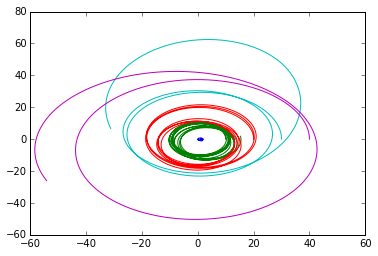

In [20]:
%matplotlib inline

import pylab
import numpy as np

n = 5
d = 2
shape=(n,d)
m = np.array([1.0 for i in range(n)])         #質量。一応粒子ごとに違ってもよいことにする。
m[0] = 100.0                           #太陽だけとても重い。

x = np.array([[i*10,0.0] for i in range(n)])  #初期位置。惑星直列しているものとする。
v = np.array([[0.0, 10/np.linalg.norm(x[i])**0.5] for i in range(n)])  #初速は距離の逆数の平方根とした。方向は動径に直交する方向。

v[0] = np.array([0,0])
vsum = np.sum(v)
print(vsum)
v[0] = np.array([0,-np.sum(v)/100])


G = 1.0   #万有引力定数
dt = 0.03 #差分のきざみ幅

#時刻と位置を記録するリスト
ts = []
xs = []
vs = []

#10000ステップ回してみる。
for loop in range(10000):
    #時刻を求める。
    t = dt*loop
    #力を初期化する。
    F = np.zeros(n*d).reshape(shape)
    #それぞれの粒子について、
    for i in range(n):
        #相互作用する相手
        for j in range(n):
            #自分以外の相手だけ
            if i != j:
                #相対位置ベクトルを求める。
                dx = x[i] - x[j]
                r = np.linalg.norm(dx)
                #位置から力ベクトルを求める。
                F[i] += -G * m[i] * m[j] * dx / r**3
    #これで、それぞれの粒子に加わる力がもとまった。
    #以下の処理も各粒子について行う。
    #それぞれの粒子について、
    for i in range(n):
        #力から加速度ベクトルが決まる。
        a = F[i] / m[i]
        #dt後の速度ベクトルを先に求める。
        v[i] = v[i] + a*dt
        #その速度を使って、位置をdt/2だけ進める。
        x[i] = x[i] + v[i]*dt/2

    ts.append(t)
    xs.append(x.copy())
    vs.append(v.copy())

    #それぞれの粒子について、
    for i in range(n):
        #位置をもうdt/2だけ進める。
        x[i] = x[i] + v[i]*dt/2

#それぞれの粒子について、
for i in range(n):
    #プロットは、xsのx座標とy座標プロットしたい。
    xx = [pos[i][0] for pos in xs]
    yy = [pos[i][1] for pos in xs]
    pylab.plot(xx,yy)

##遅い
試しに時間をはかってみましょう。

8.8052263261
Time: 9.751246929168701


/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:16: RuntimeWarning: divide by zero encountered in double_scalars


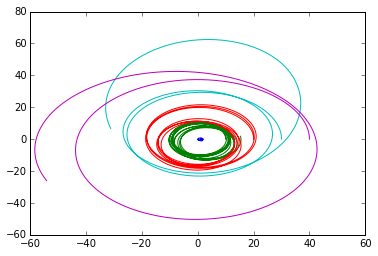

In [58]:
%matplotlib inline

import pylab
import numpy as np
import time

now = time.time()

n = 5
d = 2
shape=(n,d)
m = np.array([1.0 for i in range(n)])         #質量。一応粒子ごとに違ってもよいことにする。
m[0] = 100.0                           #太陽だけとても重い。

x = np.array([[i*10,0.0] for i in range(n)])  #初期位置。惑星直列しているものとする。
v = np.array([[0.0, 10/np.linalg.norm(x[i])**0.5] for i in range(n)])  #初速は距離の逆数の平方根とした。方向は動径に直交する方向。

v[0] = np.array([0,0])
vsum = np.sum(v)
print(vsum)
v[0] = np.array([0,-np.sum(v)/100])


G = 1.0   #万有引力定数
dt = 0.03 #差分のきざみ幅

#時刻と位置を記録するリスト
ts = []
xs = []
vs = []

#10000ステップ回してみる。
for loop in range(10000):
    #時刻を求める。
    t = dt*loop
    #力を初期化する。
    F = np.zeros(n*d).reshape(shape)
    #それぞれの粒子について、
    for i in range(n):
        #相互作用する相手
        for j in range(n):
            #自分以外の相手だけ
            if i != j:
                #相対位置ベクトルを求める。
                dx = x[i] - x[j]
                r = np.linalg.norm(dx)
                #位置から力ベクトルを求める。
                F[i] += -G * m[i] * m[j] * dx / r**3
    #これで、それぞれの粒子に加わる力がもとまった。
    #以下の処理も各粒子について行う。
    #それぞれの粒子について、
    for i in range(n):
        #力から加速度ベクトルが決まる。
        a = F[i] / m[i]
        #dt後の速度ベクトルを先に求める。
        v[i] = v[i] + a*dt
        #その速度を使って、位置をdt/2だけ進める。
        x[i] = x[i] + v[i]*dt/2

    ts.append(t)
    xs.append(x.copy())
    vs.append(v.copy())

    #それぞれの粒子について、
    for i in range(n):
        #位置をもうdt/2だけ進める。
        x[i] = x[i] + v[i]*dt/2

#それぞれの粒子について、
for i in range(n):
    #プロットは、xsのx座標とy座標プロットしたい。
    xx = [pos[i][0] for pos in xs]
    yy = [pos[i][1] for pos in xs]
    pylab.plot(xx,yy)

print("Time:",time.time() - now)

速くするために、numpyのベクトル演算を一部とりいれます。

8.8052263261
Time: 8.575109004974365


/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:16: RuntimeWarning: divide by zero encountered in double_scalars


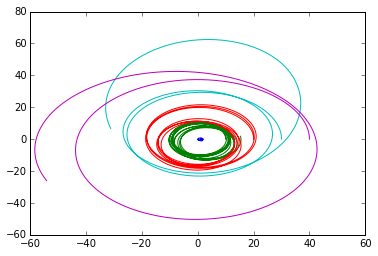

In [29]:
%matplotlib inline

import pylab
import numpy as np
import time

now = time.time()

n = 5
d = 2
shape=(n,d)
m = np.array([1.0 for i in range(n)])         #質量。一応粒子ごとに違ってもよいことにする。
m[0] = 100.0                           #太陽だけとても重い。

x = np.array([[i*10,0.0] for i in range(n)])  #初期位置。惑星直列しているものとする。
v = np.array([[0.0, 10/np.linalg.norm(x[i])**0.5] for i in range(n)])  #初速は距離の逆数の平方根とした。方向は動径に直交する方向。

v[0] = np.array([0,0])
vsum = np.sum(v)
print(vsum)
v[0] = np.array([0,-np.sum(v)/100])


G = 1.0   #万有引力定数
dt = 0.03 #差分のきざみ幅

#時刻と位置を記録するリスト
ts = []
xs = []
vs = []

#10000ステップ回してみる。
for loop in range(10000):
    #時刻を求める。
    t = dt*loop
    #力を初期化する。
    F = np.zeros(n*d).reshape(shape)
    #それぞれの粒子について、
    for i in range(n):
        #相互作用する相手
        for j in range(n):
            #自分以外の相手だけ
            if i != j:
                #相対位置ベクトルを求める。
                dx = x[i] - x[j]
                r = np.linalg.norm(dx)
                #位置から力ベクトルを求める。
                F[i] += -G * m[i] * m[j] * dx / r**3
    #これで、それぞれの粒子に加わる力がもとまった。
    #以下の処理も各粒子について行う。
    #それぞれの粒子について、
    #力から加速度ベクトルが決まる。
    #dt後の速度ベクトルを先に求める。
    v[:,0] += (F[:,0]/m[:])*dt
    v[:,1] += (F[:,1]/m[:])*dt
    #その速度を使って、位置をdt/2だけ進める。
    x[:,:] += v[:,:]*dt/2

    ts.append(t)
    xs.append(x.copy())
    vs.append(v.copy())

    #それぞれの粒子について、
    #位置をもうdt/2だけ進める。
    x[:,:] = x[:,:] + v[:,:]*dt/2

#それぞれの粒子について、
for i in range(n):
    #プロットは、xsのx座標とy座標プロットしたい。
    xx = [pos[i][0] for pos in xs]
    yy = [pos[i][1] for pos in xs]
    pylab.plot(xx,yy)

print("Time:",time.time() - now)

多少速くなりました。もう少しとりいれます。

8.8052263261
Time: 8.527950048446655


/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:16: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:52: RuntimeWarning: divide by zero encountered in true_divide


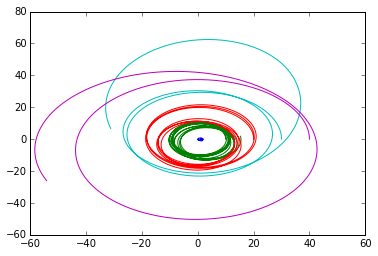

In [57]:
%matplotlib inline

import pylab
import numpy as np
import time

now = time.time()

n = 5
d = 2
shape=(n,d)
m = np.array([1.0 for i in range(n)])         #質量。一応粒子ごとに違ってもよいことにする。
m[0] = 100.0                           #太陽だけとても重い。

x = np.array([[i*10,0.0] for i in range(n)])  #初期位置。惑星直列しているものとする。
v = np.array([[0.0, 10/np.linalg.norm(x[i])**0.5] for i in range(n)])  #初速は距離の逆数の平方根とした。方向は動径に直交する方向。

v[0] = np.array([0,0])
vsum = np.sum(v)
print(vsum)
v[0] = np.array([0,-np.sum(v)/100])


G = 1.0   #万有引力定数
dt = 0.03 #差分のきざみ幅

#時刻と位置を記録するリスト
ts = []
xs = []
vs = []

#相互作用計算のための条件リスト
unit = np.identity(n)

#10000ステップ回してみる。
for loop in range(10000):
    #時刻を求める。
    t = dt*loop
    #力を初期化する。
    F = np.zeros(n*d).reshape(shape)
    #それぞれの粒子について、
    for i in range(n):
        #相互作用する相手
        pos = x[i]
        dx = np.zeros(n*d).reshape(shape)
        dx[:,0] = pos[0] - x[:,0]
        dx[:,1] = pos[1] - x[:,1]
        r = np.zeros(n)
        r[:] = dx[:,0]*dx[:,0] + dx[:,1]*dx[:,1]
        r[:] = np.sqrt(r[:])*r[:]
        mi = m[i]
        mr = m / r
        Fx = -G * mi * mr[r!=0] * dx[r!=0,0]
        Fy = -G * mi * mr[r!=0] * dx[r!=0,1]
        F[i] = np.array([Fx.sum(),Fy.sum()])
    #これで、それぞれの粒子に加わる力がもとまった。
    #以下の処理も各粒子について行う。
    #それぞれの粒子について、
    #力から加速度ベクトルが決まる。
    #dt後の速度ベクトルを先に求める。
    v[:,0] += (F[:,0]/m[:])*dt
    v[:,1] += (F[:,1]/m[:])*dt
    #その速度を使って、位置をdt/2だけ進める。
    x += v*dt/2

    ts.append(t)
    xs.append(x.copy())
    vs.append(v.copy())

    #それぞれの粒子について、
    #位置をもうdt/2だけ進める。
    x += v*dt/2

#それぞれの粒子について、
for i in range(n):
    #プロットは、xsのx座標とy座標プロットしたい。
    xx = [pos[i][0] for pos in xs]
    yy = [pos[i][1] for pos in xs]
    pylab.plot(xx,yy)

print("Time:",time.time() - now)

だいぶaggressiveにnumpyをとりいれましたが、速くならないようです。pythonの限界でしょうか。

力の計算の部分だけは、Cで書く必要がありそうです。